# **Laboratorio 2: Una introducción a Matplotlib**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340:** Fundamentos del machine learning

**Nombres de los integrantes**


1.  Laura Julieth Carretero Serrano
2.  Juan David Rios Nisperuza

**Número del grupo**

*3*


# **1. Gráficos simples**

Para comenzar la introducción a la librería *Matplotlib*, deben graficar curvas simples y conjuntos de datos en un solo gráfico con los respectivos nombres de los ejes, título, leyendas y escalas. 

In [3]:
"""
Nota: El siguiente fragmento de código detecta si Matplotlib está instalado en su sistema.

NO SE DEBE MODIFICAR ESTE FRAGMENTO.


"""

try:
  import matplotlib as plt
  print(f"Matplotlib versión {plt.__version__} se encuentra instalada en su sistema.")
except ImportError:
  print("Matplotlib no encontrado en su sistema. Verifique la instalación de Numpy.")

Matplotlib versión 3.8.4 se encuentra instalada en su sistema.


**1.1.Veamos como crear gráficos simples.**

Para ello, vamos a graficar las funciones $sin(t)$ y $cos(t)$ en función del tiempo $t$.

Lo primero que vamos a hacer es crear un arreglo unidimensional que contenga los datos del tiempo. Para ello podemos usar la función *np.linspace()* de Numpy:

In [4]:
import numpy as np
# Arreglo unidimensional con 100 números entre 0.1 y 1.0
time = np.linspace(0.1,10,100)


Para calcular el valor de las funciones seno y coseno para cada valor de tiempo en el arreglo $t$, utilizamos las funciones de *Numpy*, $np.sin()$ y $np.cos()$. Ambas retornan un arreglo con los valores calculados:

In [5]:
sin_function = np.sin(time)
cos_function = np.cos(time)

Ahora que tenemos los datos que queremos graficar, debemos configurar la gráfica que mostrará esta información. Para ello importamos la función *subplots()*, que permite crear una figura con múltiples gráficos. Los parámetros de esta función permiten configurar la ventana que va a contener las gráficas (cada "gráfica" en esta libreria se entiende como subplot -los ejes y su información- y plot -los datos que contienen estos ejes-). Los parámetros que principalmente se utilizan se describen a continuación:

- *nrows*, *ncols*: Definen el número de filas y columnas en la cuadrícula de subplots, esto es, la distribución de los subplots en la ventana (Valor 1 por defecto para cada uno, es decir, un único subplot).
- *sharex, sharey*: Define si los subplots deben compartir un mismo eje *x* ó eje *y* (Valor por defecto 'False', así cada subplot tiene sus propios ejes).
- *figsize*: Define el tamaño del gráfico a través de una tupla (alto, ancho) con cada dimensión en pulgadas: *figsize = (Height, width)*
- *layout* = Ajusta automáticamente la distribución de los subplots en la ventana para evitar que superpogan entre sí. Su valor recomendado es *layout = "constrained"*.

La notación de la función bajo los anteriores parámetros sería:

```
fig, ax = plt.subplots(nrows, ncols, sharex = False/True, sharey = False/True, figsize = (height, width), layout="constrained")
```

Bajo este llamado, la función subplots() retorna dos objetos: *fig* y *axe*. El objeto *fig* representa la ventana e incorpora las características que le hemos proporcionado a través de los parámetros anteriores. Por su parte, el objeto *ax*  representa cada subplot y nos permite configurar los detalles de cada uno. Veamos las opciones que se utilizan comúnmente:

- *ax[fila,columna]*: Posición del subplot en la cuadrícula de la figura.
- *ax[fila,columna].plot(x,y,label = 'leyenda para la curva', linewidth = Grosor de curva)* : Grafica el conjunto de datos *y* contra el conjunto *x*
- *ax[fila,columna].set(xlabel = 'Título del eje x', ylabel = 'Título del eje y', title = 'Título del subplot')*: Asigna títulos a los ejes y al subplot
- *ax[fila,columna].legend(loc = 'Ubicación de la leyenda')*: Muestra la leyenda de las curvas graficadas, la ubicaciones pueden ser: *'right', 'left', 'center', 'upper right', 'upper left', 'lower right', 'lower left', 'center right', 'center left', 'upper center, 'lower center'*
- *ax[fila,columna].grid()*: Muestra la cuadrícula de los ejes.
- *ax[fila,columna].set_xlim([mínimo, máximo])*: Establece límites para el eje $x$.
- *ax[fila,columna].set_ylim([mínimo, máximo])*: Establece límites para el eje $y$.

Esta notación es necesaria cuando la ventana incluye más de un subplot, porque debemos especificar para cual subplot estamos dando los detalles. Si la ventana contiene solo un subplot (se ha configurado la función subplots() con una fila y una columna), no es necesario especificar la ubicación y se sustituye *ax[fila, columna]* por *ax* en la descripción anterior.

Cabe resaltar que hay otras formas de configurar el gráfico para llegar al mismo resultado, depende del estilo de cada programador.

Una vez configurados los ejes de cada subplot podemos agregar un titulo general a toda la figura. Para ello hacemos uso de la función *fig.suptitle()*:

```
fig.suptitle('Título general del gráfico')
```
Una vez se tiene la configuración deseada mostramos el gráfico resultante llamando la función:

```
plt.show()
```

Veamos como se utilizan todos los elementos que hemos descrito para crear una figura que contenga un único subplot, y que muestre simúltaneamente la gráfica de la función seno y coseno cuyos datos calculamos previamente:


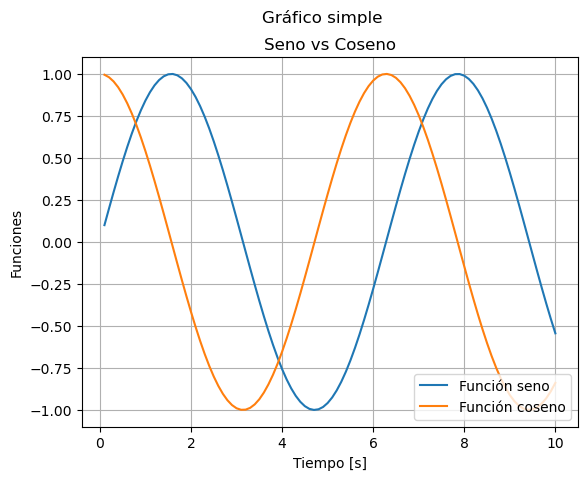

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(time,sin_function,label='Función seno')
ax.plot(time,cos_function,label='Función coseno')
ax.set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Seno vs Coseno')
ax.legend(loc='lower right')
ax.grid()
fig.suptitle('Gráfico simple')
plt.show()

Si quisieramos presentar las curvas en dos subplots diferentes, cambiamos el número de filas y/o columnas de la configuración de la función $subplots()$ como ya lo mencionamos. Por ejemplo, si se quisiera presentar un gráfico de dos filas y dos columnas escribimos:

```
fig, ax = plt.subplots(2, 2)
```

Veamos como se representarían las curvas anteriores en dos subplots:

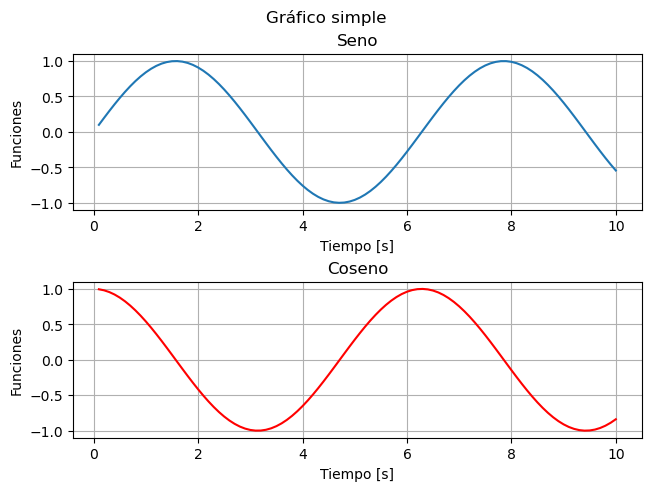

In [7]:
# De esta forma la ventana incluye los subplots, en dos filas y una columna
fig, ax = plt.subplots(2,1,layout='constrained') 
# Configuración del subplot superior
ax[0].plot(time,sin_function,label='Función seno')
ax[0].grid()
ax[0].set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Seno')
#Configuración del subplot inferior
ax[1].plot(time,cos_function,label='Función coseno', color='red')
ax[1].grid()
ax[1].set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Coseno')
#Agregamos un título
fig.suptitle('Gráfico simple')
#Mostramos el gráfico
plt.show()

Es necesario aclarar que hay diferentes formas de representar un conjunto de datos. Al usar el método *plot()* en los ejemplos anteriores, internamente *Matplotlib* crea una línea de tendencia entre los datos, por esta razón la gráficas se muestran como curvas continúas. No obstante, la libreria permite crear otros tipos de gráficos, destacamos:

- *scatter:* Gráfico de dispersión, representa los datos como puntos sin mostrar una línea de tendencia.
- *bar:* Grafico de barras, representa los datos como la altura de un diagrama de barras.
- *errorbar:* Incluye barras de error para datos estadísticos.
- *fill_between*: Sombrea áreas de confianza.
- *hist*: Muestra un histograma de los datos.

La documentación de estas funciones se encuentra en el siguiente link: [Documentación](https://matplotlib.org/stable/gallery/index.html)






##**1.2. Ejercicios**

Resuelva los siguientes ejercicios:

**1.2.1.** Grafique las siguientes funciones en cuatro subplots, incluya labels, títulos en subplots y título para la figura:

- $f(t) = \ln(t^2) $, (Título: Logarítmica)
- $g(t) = \frac{e^{-t}}{t}$, (Título: Exponencial)
- $f(t) + g(t)$, (Título: Suma)
- $f(g(t))$, (Título: Compuesta)

Donde $t$ está en segundos y $f(t), g(t)$ están en metros. Considere un intervalo de tiempo de 30 instantes entre 0.5 y 3.0 segundos.

In [8]:
t = np.linspace(0.5,30,30)
#Funcion logaritmo
logaritmo = np.log(t**2)
#Funcion exponencial
exponencial = (np.exp(-t)/t)
#Suma de funciones
suma_funciones = logaritmo + exponencial
#Funcion compuesta
compuesta = np.log(exponencial**2)

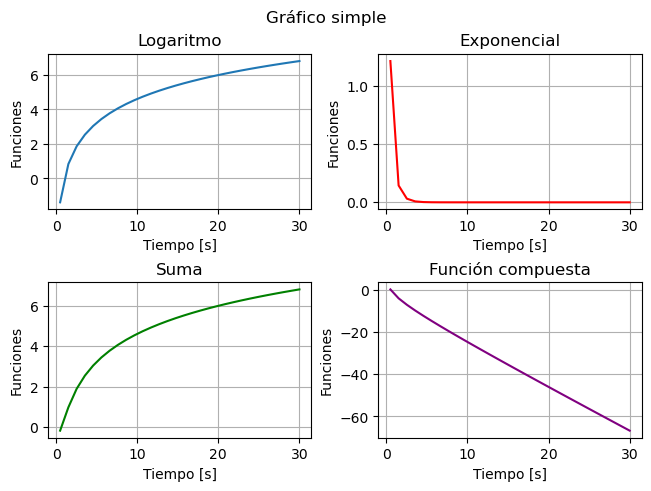

In [9]:
# Grafica Logaritmo
fig, ax = plt.subplots(2,2,layout='constrained')    
ax[0,0].plot(t,logaritmo,label='Logaritmo')
ax[0,0].grid()
ax[0,0].set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Logaritmo')
# Grafica Exponencial
ax[0,1].plot(t,exponencial,label='Exponencial', color='red')
ax[0,1].grid()
ax[0,1].set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Exponencial')
# Grafica Suma de funciones
ax[1,0].plot(t,suma_funciones,label='Suma', color='green')
ax[1,0].grid()
ax[1,0].set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Suma')
# Grafica Función compuesta
ax[1,1].plot(t,compuesta,label='Función compuesta', color='purple')
ax[1,1].grid()
ax[1,1].set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Función compuesta')
#Agregamos un título
fig.suptitle('Gráfico simple')
#Mostramos el gráfico
plt.show()

**1.2.2.** Grafique las mismas funciones anteriores pero esta vez sobre un mismo subplot, ahora incluyendo la leyenda ubicada en la parte inferior izquierda. El grosor de las curvas ahora debe ser de 2.

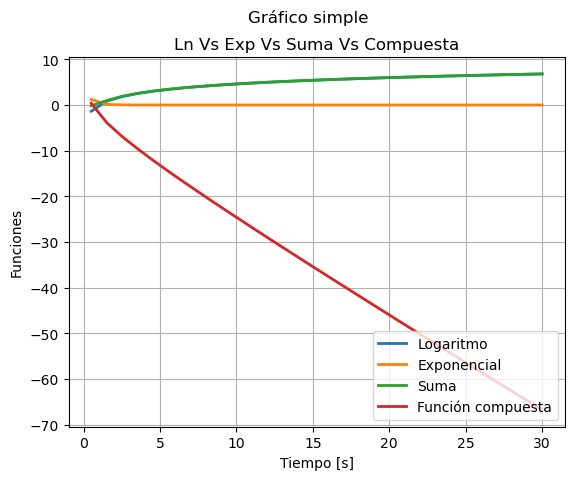

In [10]:
fig,ax = plt.subplots()
ax.plot(t,logaritmo,label='Logaritmo',linewidth=2)
ax.plot(t,exponencial,label='Exponencial',linewidth=2)
ax.plot(t,suma_funciones,label='Suma',linewidth=2)
ax.plot(t,compuesta,label='Función compuesta',linewidth=2)
ax.set(xlabel = 'Tiempo [s]', ylabel='Funciones', title = 'Ln Vs Exp Vs Suma Vs Compuesta')
ax.legend(loc='lower right')
ax.grid()
fig.suptitle('Gráfico simple')
plt.show()

**1.2.3.** Suponga que hizo una regresión lineal de la posición en el tiempo de un atleta, donde obtuvo la siguiente ecuación:

\begin{align*}
  x = 3t - 1
\end{align*}

También sabe que el error de todos los datos es de $0.3$ para ambas variables. Grafique 10 puntos de forma *errorbar* donde incluya barras de error en cada punto. Además, el eje horizontal debe estar entre $5$ y $10$.

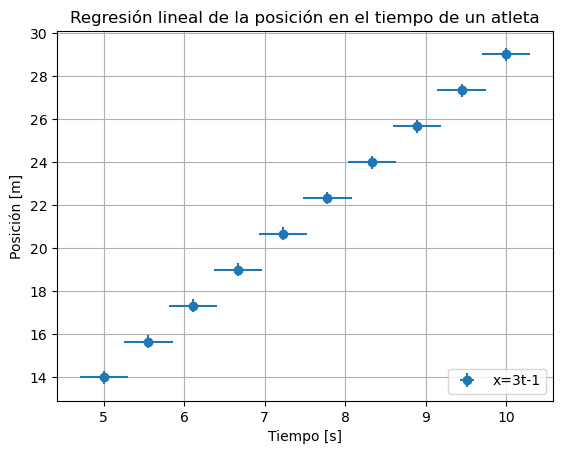

In [11]:
time = np.linspace(5,10,10)

ecuacion = 3*time-1

plt.errorbar(time,ecuacion,yerr=0.3, xerr=0.3,fmt='o',label='x=3t-1')

plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Regresión lineal de la posición en el tiempo de un atleta')
plt.legend(loc='lower right')
plt.grid()
plt.show()



**1.2.4.** Suponga que la regresión anterior no fue suficiente y necesita también graficar la regresión de la frecuencia cardiaca, como $scatter$, con la siguiente relación:

\begin{align*}
  HF = 70 + 2\sqrt{10t}
\end{align*}

Grafique sobre el mismo subplot pero agregue un eje vertical a la derecha correspondiente a la frecuencia cardiaca en unidades de $\frac{beat}{min}$. Incluya leyendas. El eje asociado a la frecuencia cardíaca debe ir desde 70 hasta 115.

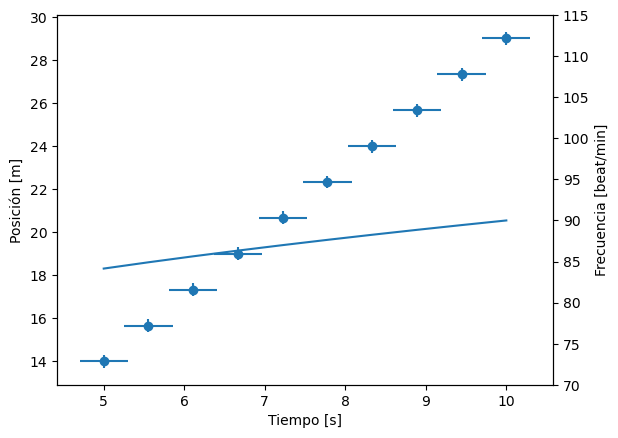

In [12]:
funcion_hf = 70 + (2*np.sqrt(10*time))

fig, ax = plt.subplots()
ax.errorbar(time,ecuacion,yerr=0.3, xerr=0.3,fmt='o',label='x=3t-1')
ax2 = ax.twinx()
ax2.plot(time,funcion_hf,label='70+2*sqrt(10t)')
ax2.set_ylim(70,115)
ax2.set_ylabel('Frecuencia [beat/min]')
ax.set_ylabel('Posición [m]')
ax.set_xlabel('Tiempo [s]')
plt.show()


*1.2.5* Genere 1000 datos aleatorios con distribución uniforme y otros 1000 con distribución normal y súmelos entre sí de la siguiente forma:

```
uniform_set = np.random.uniform(size = 1000)
normal_set = np.random.normal(size = 1000)
sum_distributions = np.add(uniform_set, normal_set)

```

Grafique el correspondiente histograma para 10, 20, 30 y 50 particiones (bins), cada una en un subplot diferente dentro de la misma figura. Agregue título al gráfico, a los subplots, y a los ejes (invente el título para estos).

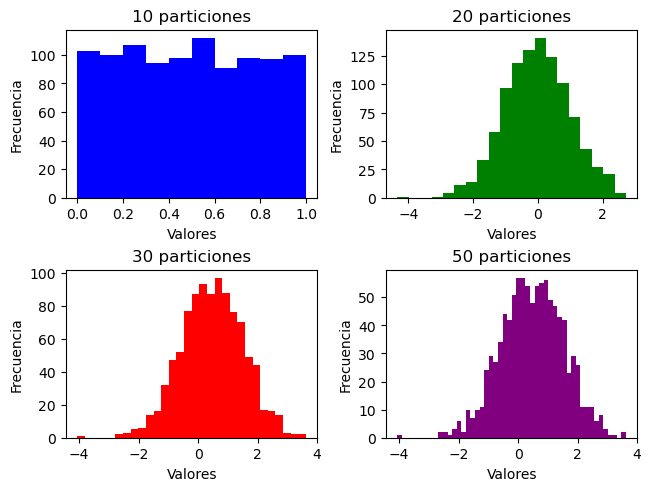

In [13]:
uniform_set = np.random.uniform(size = 1000)
normal_set = np.random.normal(size = 1000)
sum_distributions = np.add(uniform_set, normal_set)

fig, ax = plt.subplots(2,2,layout='constrained')
# Graficar histogramas en los subgráficos
ax[0, 0].hist(uniform_set, bins=10, color='blue')
ax[0,0].set(xlabel = 'Valores', ylabel='Frecuencia', title = '10 particiones')

ax[0, 1].hist(normal_set, bins=20, color='green')
ax[0,1].set(xlabel = 'Valores', ylabel='Frecuencia', title = '20 particiones')

ax[1, 0].hist(sum_distributions, bins=30, color='red')
ax[1,0].set(xlabel = 'Valores', ylabel='Frecuencia', title = '30 particiones')

ax[1, 1].hist(sum_distributions, bins=50, color='purple')
ax[1,1].set(xlabel = 'Valores', ylabel='Frecuencia', title = '50 particiones')


plt.show()


# **2. Superficies y curvas de nivel**

Durante el curso se tratarán temas de optimización donde será necesaria la manipulación de campos escalares. Muchos procesos de optimización requieren un análisis gráfico para revisar el comportamiento de la función y evaluar las soluciones. Este análisis comprende el estudio de las superficies y curvas de nivel, de allí que sean fundamentales para el curso. 

Para comenzar, definimos un campo escalar como una función que mapea desde $\mathbb{R^n}$ hasta $\mathbb{R}$. Es decir, toma un vector de variables independientes $[x_1, x_2, ..., x_n]^T$ y lo transforma en un escalar (de ahí su nombre):

\begin{align*}
f: \mathbb{R^n}  \rightarrow \mathbb{R}.
\end{align*}

El análisis gráfico de este tipo de funciones esta restringido a $n\leq2$ dimensiones, cuando la curva se describe en el espacio tridimensional. Para dimensiones mayores no es posible hacer este tipo de análisis.

**2.1. Superficies**

 Veamos cómo podemos graficar una superficie. En primer lugar debemos tomar una función $f$ tal que $f: \mathbb{R^2}  \rightarrow \mathbb{R}$. Para este ejemplo usemos un paraboloide, que se define como:

\begin{align*}
f(x_1,x_2) = x_1^2 + x_2^2
\end{align*}

El proceso es similar a un gráfico simple, pero con algunos parámetros adicionales. Primero, veremos cómo cambia la función *subplots*, a la cual se le debe adicionar el parámetro $subplot\_kw$:

```
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
```

Que especifica al software que se trata de una superficie. Luego, definimos los arreglos que contendran los valores de las variables independientes $x$ y $y$ tal y como lo hicimos para funciones en el plano 2D:

```
x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
```

No obstante, no podemos utilizar directamente estos arreglos, debemos usarlos definir una malla ($grid$), es decir, una cuadrícula de puntos que simule el plano XY. Para ello usamos la función *meshgrid()* de Numpy pasando por argumento los arreglos anteriormente creados:

```
(X_1, X_2) = np.meshgrid(x_1, x_2)
```

La función *meshgrid()* retorna dos matrices: $X\_1$ (en donde cada fila es una copia del arreglo $x\_1$) y $X\_2$ (en donde cada columna es una copia del arreglo $x\_2$). Teniendo en cuenta como operan los arreglos de Numpy basta escribir la función de la forma:

```
f = X_1**2 + X_2**2
```

Para obtener el valor de la función en cada punto de la malla. Finalmente, para graficar la superficie utilizamos el método *plot_surface* del objeto *ax* que retorna *subplots*. Este metodo recibe como parámetros las variables independientes en forma de cuadrícula, $(x,y)$ , y la variable dependiente $f$:

```
surf = ax.plot_surface(X_1, X_2, f)
```

Tal como en el caso de gráficas simples, el objeto *ax* contiene diferentes métodos y parámetros que nos permiten configurar y ajustar diferentes aspectos de la gráfica. Algunos de ellos son:

- *rcount, ccount:* Indica la cantidad de muestras que toma de cada variable independiente. El valor por defecto es 50.
- *cmap:* Establece una paleta de colores para la superficie (Todas las opciones disponibles se encuentran aquí https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- *facecolors:* Colorea un solo cuadrante de la cuadrícula.
- *shade:* Agrega sombra. (True por defecto).

Además de las opciones para ajustar titulos, etiquetas, leyendas y valores extremos que vimos anteriormente para gráficos simples, y que funcionan de forma similar para superficies.


*Nota:* Es posible que el título del eje vertical no sea visible. Para solucionar eso, se incluye el siguiente comando:
```
ax.set_box_aspect(aspect=None, zoom=0.8)
```
Y luego se ajusta el tamaño de la figura.

Finalmente, todo el código reunido se muestra a continuación:

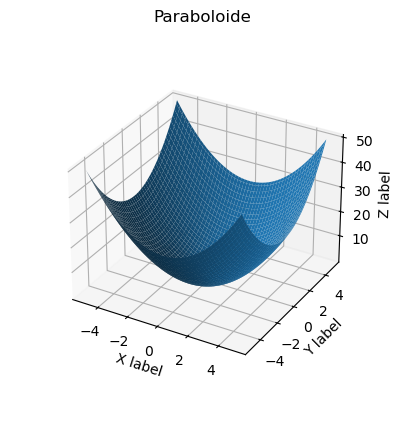

In [14]:
# Configuramos la función subplots() para graficar superficies
fig, ax = plt.subplots(subplot_kw={"projection": "3d"} ,  figsize = (5, 5))
x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
# Generamos la malla de puntos
(X_1, X_2) = np.meshgrid(x_1, x_2)
# Calculamos el valor de la función para cada punto de la malla
f = X_1**2 + X_2**2

# Utilizando la función plot_surface() creamos la superficie
surf = ax.plot_surface(X_1, X_2, f)
# Configuramos los detalles específicos del gráfico
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")
ax.set_box_aspect(aspect=None, zoom=0.8) # Ajusta el tamaño de la superficie para visualizar el titulo
ax.set(title = 'Paraboloide')

plt.show()

Al igual que en el caso de gráficos simples, existen diferentes tipos de superficie que pueden graficarse. Para utilizar cualquiera de las siguientes opciones basta con reemplazar la función *plot_surface* en el código anterior:

- *scatter:* Genera un gráfico de dispersión en el espacio 3D.
- *bar3d:* Genera un histograma tridimensional.
- *plot_wireframe:* Cambia la superficie por un alambrado.
- *plot_trisurf:* Modifica la cuadrícula por triángulos.
- *errorbar:* Añade barras de error a los puntos que se grafican.


**2.2. Curvas de nivel**

En ocasiones, el análisis gráfico mediante la superficie de una función presenta dificultades y en la mayoría de casos resulta ser muy costoso computacionalmente. Una alternativa más conveniente consiste en representar un campo escalar mediante sus curvas de nivel.
Supongamos que se tiene una función que describe una superficie en el espacio, $f(x,y)$. Cada plano horizontal trazado corta a la superficie en una curva (es decir, al cortar la superficie con un plano horizontal lo que queda dibujado en este último es una curva). La proyección de esta curva sobre el plano XY es una curva de nivel:

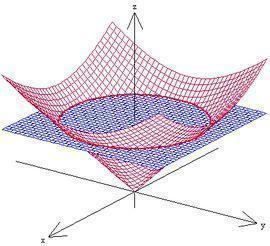

En el caso de un paraboloide, el corte transversal a lo largo del eje vertical genera una circunferencia, por lo cual su curva de nivel corresponde a un conjunto de circulos concéntricos, cada uno asociado a un valor de $z$ específico. 

En esencia, hay dos formas de representar curvas de nivel, puede ser a través de una curva generada o mediante un mapa de calor. Para ello hacemos uso de las funciones *contour* y *contourf* respectivamente, que toman por parametros la malla de puntos de las variables independientes, $(x,y)$ , y los valores de la variable dependiente calculados. En primer lugar, llamamos a la vieja confiable *subplots* y al objeto *ax* que retorna, *contour* y *contourf* son métodos de este último:

```
CS = ax.contour(X_1, X_2, f)
CS = ax.contourf(X_1, X_2, f)
```

Tal como se da en los gráficos simples y en las superficies, el uso de *ax* trae consigo diferentes métodos y parámetros que nos permiten configurar, ajustar y personalizar este tipo de curvas. Algunos de ellos son:

- *levels*: Indica el número de contornos que se grafica.
- *alpha*: Indica la transparencia de los colores. (*alpha* = 0: invisible, *alpha = 1: visible)
- *colors*: Indica el color de las curvas.
- *cmap*: Cambia la paleta de color del mapa de calor ó de las curvas generadas.

*Nota:* Ambos métodos comparten estos parámetros.

Adicionalmente, cuando se trabaja con curvas de nivel, existen otros métodos útiles como *clabel*, que permite agregar títulos a las curvas de forma similar a la leyenda de un gráfico simple:

```
ax.clabel(CS)
```
Algunos argumentos de este método son:

- *fontsize*: Ajusta el tamaño de la letra.
- *colors*: Especifica el color de la letra.
- *rightside_up*: Cambia la orientación del texto de forma radial (True por defecto)

Finalmente, para el caso del método *contourf* es conveniente agregar una barra de color que indique el valor numérico asociado a cada color:

```
fig.colorbar(CS)
```

Veamos como crear curvas de nivel para el paraboloide de la sección anterior:

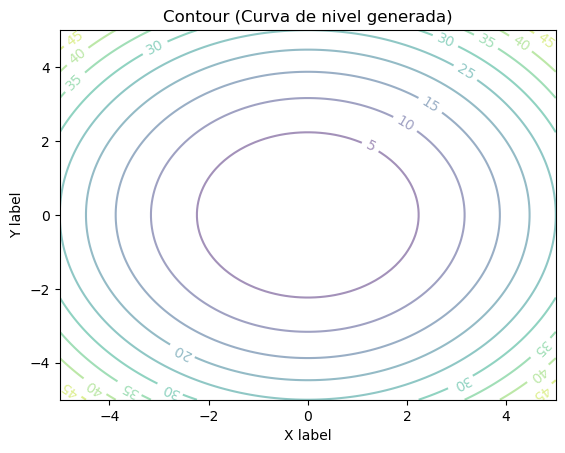

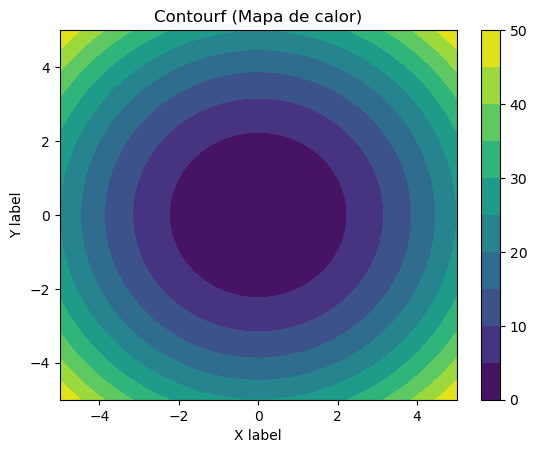

In [15]:
fig, ax = plt.subplots()
# Variables independientes
x_1 = np.linspace(-5,5,100)
x_2 = np.linspace(-5,5,100)
# Formamos la malla
(X_1, X_2) = np.meshgrid(x_1, x_2)
# Calculamos los valores de la función
f = X_1**2 + X_2**2

# Creamos la curva generada y ajustamos sus opciones
CS1 = ax.contour(X_1, X_2, f, alpha = 0.5, levels=10)
ax.clabel(CS1, rightside_up = False)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set(title = 'Contour (Curva de nivel generada)')

# Creamos el mapa de color y ajustamos sus opciones
fig, ax = plt.subplots()
CS2 = ax.contourf(X_1, X_2, f, levels=10)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set(title = 'Contourf (Mapa de calor)')
fig.colorbar(CS2) # Insertamos la barra de color
plt.show()

**2.3. Ejercicios**

Resuelva los siguientes ejercicios. Las funciones a continuación son formas cuadráticas, que serán útiles en algunos métodos de optimización.

**2.3.1.** Grafique una superficie para las siguientes funciones cuadráticas en cuatro subplots de una misma figura (recuerde añadir labels para los tres ejes, títulos a los subplots y título general):

- $f_1(x_1, x_2) = 2x_1^2 - 4x_2^2 + 1$, (surface, agregue coloreado tipo *coolwarm*)
- $f_2(x_1, x_2) = 5x_1^2 - x_2^2$, (scatter)
- $f_3(x_1, x_2) = x_1^2 + x_2^2 + 2x_1x_2$, (wireframe)
- $f_4(x_1, x_2) = x_1^2 - x_2^2 - 3x_1x_2$, (trisurf)

Donde $x_1 \in [-10,10], x_2 \in [-10,10]$. Considere 100 puntos para cada arreglo.

[Text(0.5, 0.92, 'Función 4')]

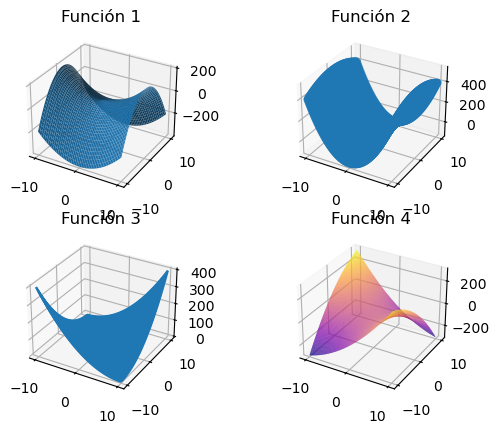

In [16]:
fig, ax = plt.subplots(2,2,subplot_kw={"projection": "3d"})
X_1 = np.linspace(-10,10,100)
X_2 = np.linspace(-10,10,100)
(X_1, X_2) = np.meshgrid(X_1, X_2)

funcion1 = 2*X_1**2 - 4*X_2**2 + 1
funcion2 = 5*X_1**2 - X_2**2
funcion3 = X_1**2 + X_2**2 + 2*X_1*X_2
funcion4 = X_1**2 - X_2**2 - 3*X_1*X_2

surf = ax[0,0].plot_surface(X_1, X_2, funcion1)
ax[0,0].set(title = 'Función 1')

scatter = ax[0,1].scatter(X_1, X_2, funcion2)
ax[0,1].set(title = 'Función 2')

wireframe = ax[1,0].plot_wireframe(X_1, X_2, funcion3)
ax[1,0].set(title = 'Función 3')

ax[1, 1].plot_trisurf(X_1.flatten(), X_2.flatten(), funcion4.flatten(), cmap='plasma')
ax[1, 1].set(title='Función 4')



**2.3.2** Grafique en cuatro subplots de una misma figura las curvas de nivel generadas de las funciones definidas anteriormente. Cada subplot debe incluir los respectivos labels para los ejes y las curvas y un título. Estas curvas de nivel deben tener 6 niveles con una transparencia de 0.7 y sus label deben ser de color negro. Finalmente agregue un titulo a toda la figura.




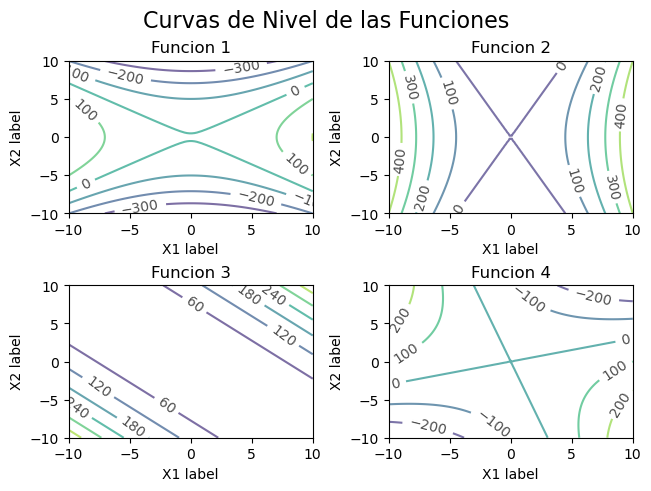

In [21]:
# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, layout='constrained')

# Graficar la curva de nivel para la funcion1
CS1 = axs[0, 0].contour(X_1, X_2, funcion1, alpha=0.7, levels=6)
axs[0, 0].clabel(CS1, colors='black')
axs[0, 0].set_xlabel("X1 label")
axs[0, 0].set_ylabel("X2 label")
axs[0, 0].set_title('Funcion 1')

# Graficar la curva de nivel para la funcion2
CS2 = axs[0, 1].contour(X_1, X_2, funcion2, alpha=0.7, levels=6)
axs[0, 1].clabel(CS2, colors='black')
axs[0, 1].set_xlabel("X1 label")
axs[0, 1].set_ylabel("X2 label")
axs[0, 1].set_title('Funcion 2')

# Graficar la curva de nivel para la funcion3
CS3 = axs[1, 0].contour(X_1, X_2, funcion3, alpha=0.7, levels=6)
axs[1, 0].clabel(CS3, colors='black')
axs[1, 0].set_xlabel("X1 label")
axs[1, 0].set_ylabel("X2 label")
axs[1, 0].set_title('Funcion 3')

# Graficar la curva de nivel para la funcion4
CS4 = axs[1, 1].contour(X_1, X_2, funcion4, alpha=0.7, levels=6)
axs[1, 1].clabel(CS4, colors='black')
axs[1, 1].set_xlabel("X1 label")
axs[1, 1].set_ylabel("X2 label")
axs[1, 1].set_title('Funcion 4')

# Ajustar el título general para toda la figura
plt.suptitle('Curvas de Nivel de las Funciones', fontsize=16)
plt.show()

**2.3.3.** Grafique en cuatro subplots de una misma figura el mapa de calor de las funciones anteriores. Incluya labels, títulos y título general, así como barra de color. Cada mapa de color debe contar con 12 niveles.

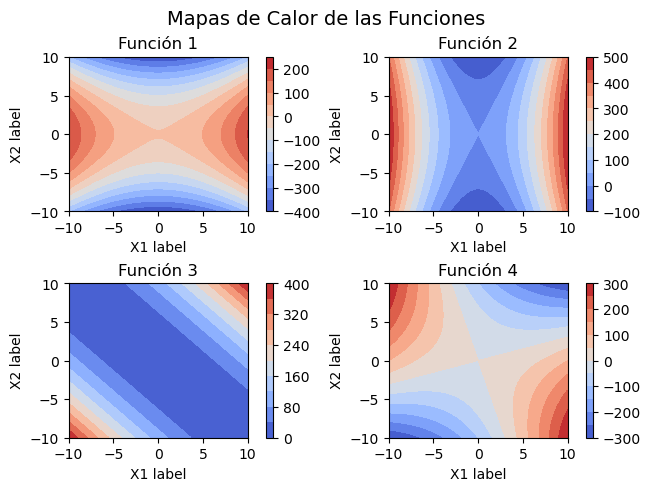

In [22]:
# Crear la figura y los subplots
fig, axes = plt.subplots(2, 2, layout = 'constrained')
fig.suptitle("Mapas de Calor de las Funciones", fontsize=14)

# Dibujar el mapa de calor de la función 1
CS1 = axes[0, 0].contourf(X_1, X_2, funcion1, levels=12, cmap='coolwarm')
axes[0, 0].set_xlabel("X1 label")
axes[0, 0].set_ylabel("X2 label")
axes[0, 0].set(title="Función 1")
fig.colorbar(CS1, ax=axes[0, 0])

# Dibujar el mapa de calor de la función 2
CS2 = axes[0, 1].contourf(X_1, X_2, funcion2, levels=12, cmap='coolwarm')
axes[0, 1].set_xlabel("X1 label")
axes[0, 1].set_ylabel("X2 label")
axes[0, 1].set(title="Función 2")
fig.colorbar(CS2, ax=axes[0, 1])

# Dibujar el mapa de calor de la función 3
CS3 = axes[1, 0].contourf(X_1, X_2, funcion3, levels=12, cmap='coolwarm')
axes[1, 0].set_xlabel("X1 label")
axes[1, 0].set_ylabel("X2 label")
axes[1, 0].set(title="Función 3")
fig.colorbar(CS3, ax=axes[1, 0])

# Dibujar el mapa de calor de la función 4
CS4 = axes[1, 1].contourf(X_1, X_2, funcion4, levels=12, cmap='coolwarm')
axes[1, 1].set_xlabel("X1 label")
axes[1, 1].set_ylabel("X2 label")
axes[1, 1].set(title="Función 4")
fig.colorbar(CS4, ax=axes[1, 1])

plt.show()
